In [1]:
#packages import
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("argentina_cars.csv")
data

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,57500,dólares


##DATA PREPROCESSING

In [3]:
data.isna().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [4]:
dr_data = data.dropna(how='any')
dr_data

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
5,34500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,57500,dólares


In [5]:
dr_data.isna().sum()

money         0
brand         0
model         0
year          0
color         0
fuel_type     0
door          0
gear          0
motor         0
body_type     0
kilometres    0
currency      0
dtype: int64

In [6]:
dr_data=dr_data.loc[(dr_data.year>=2010)]
dr_data

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos
5,34500,Jeep,Compass,2022,Negro,Nafta,5.0,Automática,1.3,SUV,10500,dólares
6,25000,Kia,Sorento,2014,Negro,Diésel,5.0,Automática,2.2,SUV,156000,dólares
...,...,...,...,...,...,...,...,...,...,...,...,...
505,5250000,Chevrolet,Tracker,2018,Gris,Nafta,5.0,Automática,1.8,SUV,52000,pesos
506,46000,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,49000,dólares
507,3960000,Peugeot,2008,2017,Blanco,Nafta,5.0,Manual,1.6,SUV,75358,pesos
508,44900,Volkswagen,Amarok,2019,Gris,Diésel,4.0,Automática,3.0,Pick-Up,57500,dólares


In [7]:
dr_data =dr_data.drop(['model','color','door','motor','body_type','currency'],axis=1)

In [8]:
# dr_data["fuel_type"].unique()
dr_data["fuel_type"].value_counts()

Nafta            383
Diésel            64
Nafta/GNC         19
Híbrido/Nafta      3
Name: fuel_type, dtype: int64

In [9]:
dr_data["gear"].unique()

array(['Automática', 'Manual'], dtype=object)

In [10]:
dr_data=dr_data.replace({'fuel_type':{'Nafta':0,'Diésel':1,'Nafta/GNC':2,'Híbrido/Nafta':3}})
dr_data=dr_data.replace({'gear':{'Automática':0, 'Manual':1}})

##DATA VISUALIZATION

In [11]:
dat_vis=dr_data.loc[(dr_data.year>=2015)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Volkswagen'),
  Text(4, 0, 'Mercedes-Benz'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Fiat'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Chevrolet'),
  Text(9, 0, 'Peugeot'),
  Text(10, 0, 'Citroën'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Renault'),
  Text(13, 0, 'RAM'),
  Text(14, 0, 'Hyundai'),
  Text(15, 0, 'Baic'),
  Text(16, 0, 'Dodge'),
  Text(17, 0, 'Mitsubishi'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Chery'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'DS')])

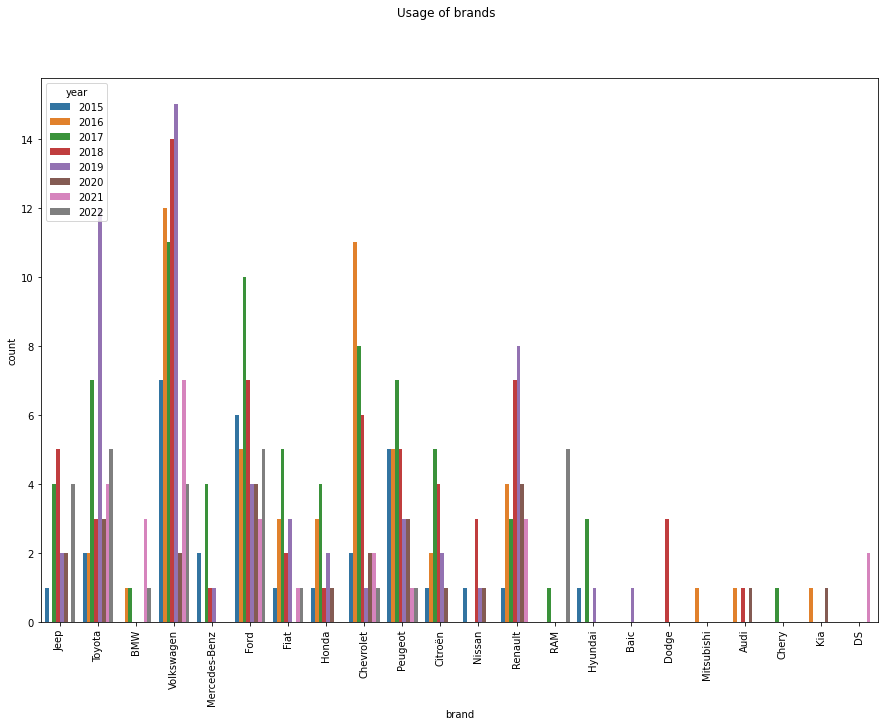

In [12]:
plt.figure(figsize=[15,10])
plt.suptitle("Usage of brands")
sb.countplot(x=dat_vis["brand"],hue=dat_vis["year"])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Jeep'),
  Text(1, 0, 'Toyota'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Volkswagen'),
  Text(4, 0, 'Mercedes-Benz'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Fiat'),
  Text(7, 0, 'Honda'),
  Text(8, 0, 'Chevrolet'),
  Text(9, 0, 'Peugeot'),
  Text(10, 0, 'Citroën'),
  Text(11, 0, 'Nissan'),
  Text(12, 0, 'Renault'),
  Text(13, 0, 'RAM'),
  Text(14, 0, 'Hyundai'),
  Text(15, 0, 'Baic'),
  Text(16, 0, 'Dodge'),
  Text(17, 0, 'Mitsubishi'),
  Text(18, 0, 'Audi'),
  Text(19, 0, 'Chery'),
  Text(20, 0, 'Kia'),
  Text(21, 0, 'DS')])

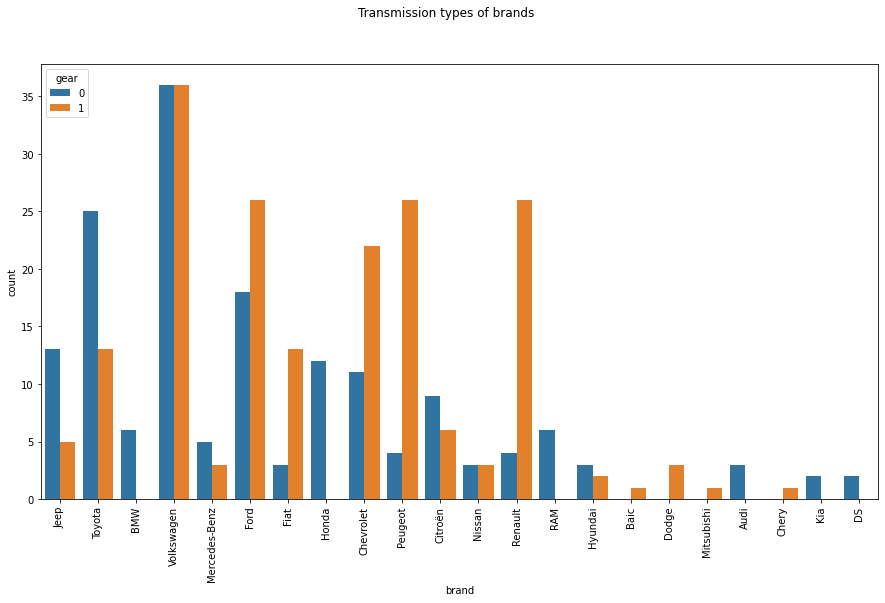

In [13]:
plt.figure(figsize=[15,8])
plt.suptitle("Transmission types of brands")
sb.countplot(x=dat_vis["brand"],hue=dat_vis["gear"])
plt.xticks(rotation=90)

<AxesSubplot:>

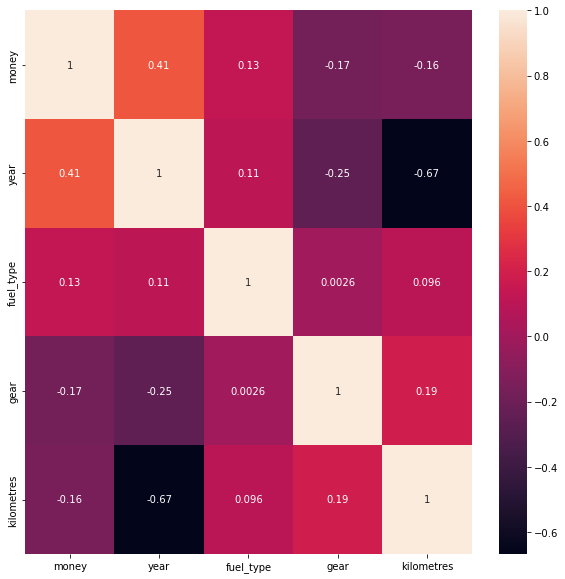

In [14]:
cor_matrix = dr_data.corr()
plt.figure(figsize=[10,10])
sb.heatmap(data=cor_matrix,annot=True)

<AxesSubplot:xlabel='fuel_type', ylabel='money'>

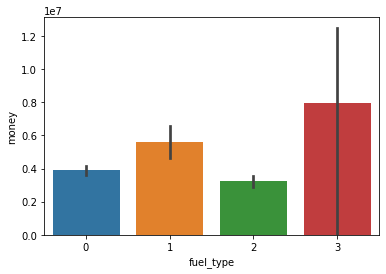

In [15]:
sb.barplot(x=dr_data['fuel_type'],y=dr_data['money'])

<AxesSubplot:xlabel='gear', ylabel='money'>

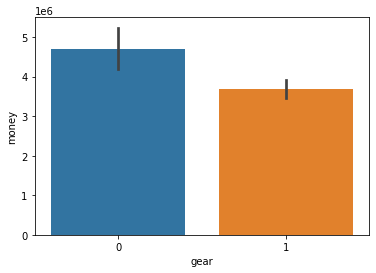

In [16]:
sb.barplot(x=dr_data['gear'],y=dr_data['money'])

<AxesSubplot:xlabel='year', ylabel='money'>

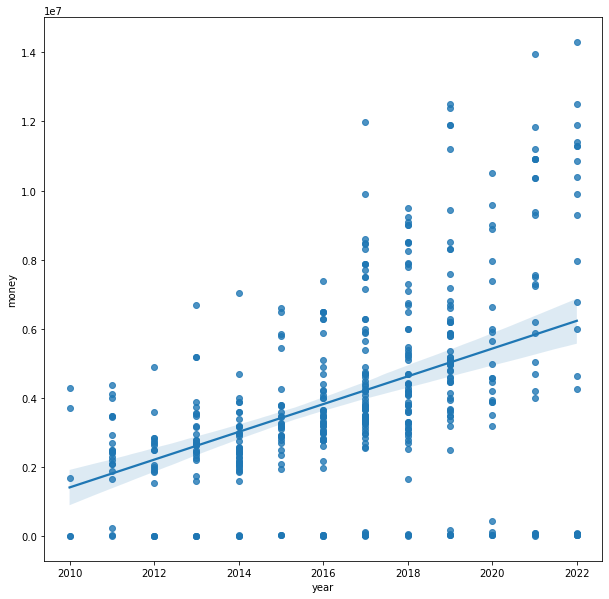

In [17]:
plt.figure(figsize=[10,10])
sb.regplot(x=dr_data['year'],y=dr_data['money'])